# Problem Statement

An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up.

The company requires to build a model wherein it needs to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Objective
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

# <font color=blue>1. Data Loading & Inspection</font>

In [10]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
df.shape

(9240, 37)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# <font color=blue>2. EDA</font>

Split the columns into two types
1. <font color=orange>Columns with missing values</font>
2. <font color=blue>Columns without missing values</font>
    
We will perform the following things separately for the above two types:
    - Univarate Analysis
    - Identifying Outliers & treating them
    - Identifying missing values & treating them

In [13]:
(df.isnull().mean() * 100)[df.isnull().mean() * 100 > 0].sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Activity Score                      45.649351
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [14]:
(df.isnull().mean() * 100)[df.isnull().mean() * 100 == 0]

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
Total Time Spent on Website                 0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview      0.0
Last Notable Activity                       0.0
dtype: float64

### <font color=red>Drop the scoring variables</font>
All these scoring variables are aquired after the evaluation which means they won't be available for the model

In [15]:
df.drop('Lead Quality', axis=1, inplace=True)
df.drop('Tags', axis=1, inplace=True)

In [16]:
df.drop('Asymmetrique Activity Score', axis=1, inplace=True)
df.drop('Asymmetrique Activity Index', axis=1, inplace=True)
df.drop('Asymmetrique Profile Index', axis=1, inplace=True)
df.drop('Asymmetrique Profile Score', axis=1, inplace=True)

In [17]:
df.shape

(9240, 31)

## <font color=blue>2.1 Univariate Analysis</font>

In [18]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### <font color=red>Drop the feature as it is highly skewed towards one item</font>

In [19]:
df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [20]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### <font color=red>Drop the Lead Profile feature as most of the data is missing</font>
'Select' as well denoted the missing

In [21]:
df.drop('Lead Profile', axis=1, inplace=True)

In [22]:
pd.isnull(df['What is your current occupation']).sum()

2690

In [23]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### <font color=green>Impute the missing values with the most frequent value as there is one clearly</font>

In [24]:
df['What is your current occupation'][pd.isnull(df['What is your current occupation'])] = df['What is your current occupation'].mode()[0]

In [25]:
pd.isnull(df['What is your current occupation']).sum()

0

In [26]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Canada                     4
Kuwait                     4
Germany                    4
Nigeria                    4
South Africa               4
Sweden                     3
Asia/Pacific Region        2
Ghana                      2
Uganda                     2
Netherlands                2
China                      2
Belgium                    2
Italy                      2
Bangladesh                 2
Philippines                2
Indonesia                  1
Sri Lanka                  1
Liberia                    1
Kenya                      1
Denmark                    1
Tanzania                   1
Vietnam       

#### <font color=red>Drop the feature Country as it is highly skewed towards one item</font>

In [27]:
df.drop('Country', axis=1, inplace=True)

In [28]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

#### <font color=red>Drop the feature as most of the data is missing</font>
'Select' as well denoted the missing

In [29]:
df.drop('How did you hear about X Education', axis=1, inplace=True)

In [30]:
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

__'Select'__ is as well missing value. Replace that with __nan__

In [31]:
df['Specialization'].replace('Select', np.nan, inplace=True)

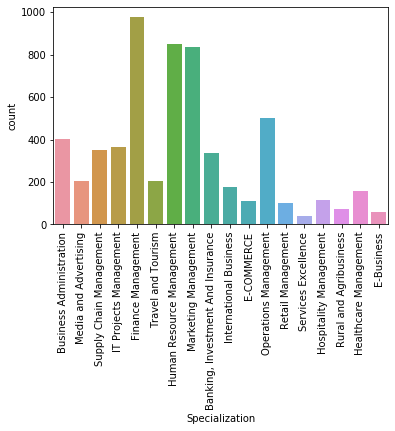

In [32]:
sns.countplot(x='Specialization', data=df)
plt.xticks(rotation=90)
plt.show()

#### <font color=green>Impute the missing values with the most frequent value </font>

In [33]:
df['Specialization'][pd.isnull(df['Specialization'])] = df['Specialization'].mode()[0]

In [34]:
pd.isnull(df['Specialization']).sum()

0

In [35]:
df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

__'Select'__ is as well missing value. Replace that with __nan__

In [36]:
df['City'].replace('Select', np.nan, inplace=True)

In [37]:
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [38]:
pd.isnull(df['City']).sum()

3669

#### <font color=green>Impute the missing values with the most frequent value as there is one clearly</font>

In [39]:
df['City'][pd.isnull(df['City'])] = df['City'].mode()[0]

In [40]:
pd.isnull(df['City']).sum()

0

In [41]:
df['Page Views Per Visit'].describe(percentiles = ([0.25,0.5,0.75,0.9,0.95,0.99,1]))

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
100%       55.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

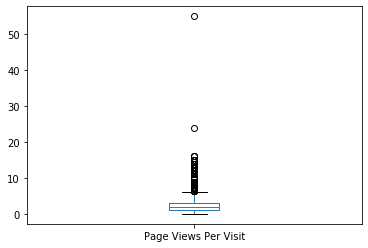

In [42]:
df['Page Views Per Visit'].plot.box()
plt.show()

#### Outliers observed

In [43]:
np.isnan(df['Page Views Per Visit']).sum()

137

#### <font color=red>Drop the missing rows as it is very less in numbers</font>

In [44]:
df = df[~np.isnan(df['Page Views Per Visit'])]

#### Cap the outliers

In [45]:
df['Page Views Per Visit'][df['Page Views Per Visit'] > 15]

125     16.0
2190    55.0
5164    16.0
5495    16.0
6805    24.0
Name: Page Views Per Visit, dtype: float64

In [46]:
df['Page Views Per Visit'][df['Page Views Per Visit'] > 15] = 16

In [47]:
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.357657
std         2.087277
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

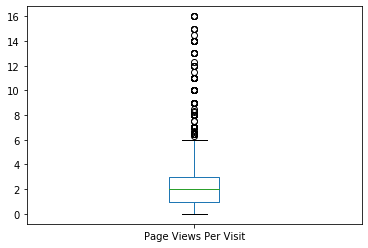

In [48]:
df['Page Views Per Visit'].plot.box()
plt.show()

In [49]:
df['TotalVisits'].describe(percentiles = ([0.25,0.5,0.75,0.9,0.95,0.99,1]))

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
100%      251.000000
max       251.000000
Name: TotalVisits, dtype: float64

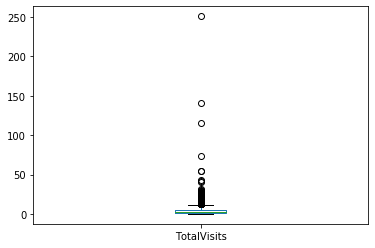

In [50]:
df['TotalVisits'].plot.box()
plt.show()

#### Outliers observed, but no missing values

In [51]:
np.isnan(df['TotalVisits']).sum()

0

#### Cap the outliers with 99th percentile

In [52]:
df['TotalVisits'][df['TotalVisits'] >= 17] = 17

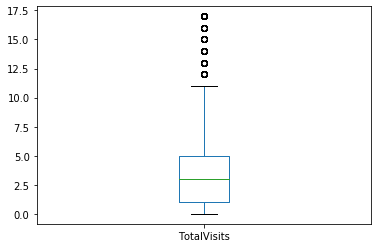

In [53]:
df['TotalVisits'].plot.box()
plt.show()

In [54]:
df['TotalVisits'].describe()

count    9103.000000
mean        3.332747
std         3.252420
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [55]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2738
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      61
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

#### Multiple levels are observed in this feature
- Mark all similar activities to one single level
- All the levels with very less occurance - group them to 'Others'

In [56]:
df['Last Activity'].replace('Email Bounced', 'Other Email Activities', inplace=True)
df['Last Activity'].replace('Email Link Clicked', 'Other Email Activities', inplace=True)
df['Last Activity'].replace('Email Marked Spam', 'Other Email Activities', inplace=True)
df['Last Activity'].replace('Email Received', 'Other Email Activities', inplace=True)
df['Last Activity'].replace('Page Visited on Website', 'Website Activity', inplace=True)
df['Last Activity'].replace('Form Submitted on Website', 'Website Activity', inplace=True)
df['Last Activity'].replace('Unreachable', 'Other', inplace=True)
df['Last Activity'].replace('Unsubscribed', 'Other', inplace=True)
df['Last Activity'].replace('Had a Phone Conversation', 'Other', inplace=True)
df['Last Activity'].replace('Approached upfront', 'Other', inplace=True)
df['Last Activity'].replace('View in browser link Clicked', 'Other', inplace=True)
df['Last Activity'].replace('Visited Booth in Tradeshow', 'Other', inplace=True)
df['Last Activity'].replace('Resubscribed to emails', 'Other', inplace=True)

In [57]:
df['Last Activity'].value_counts()

Email Opened               3437
SMS Sent                   2738
Olark Chat Conversation     972
Website Activity            756
Other Email Activities      583
Converted to Lead           428
Other                       189
Name: Last Activity, dtype: int64

In [58]:
pd.isnull(df['Last Activity']).sum()

0

In [59]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
WeLearn                 1
NC_EDM                  1
youtubechannel          1
welearnblog_Home        1
testone                 1
Pay per Click Ads       1
blog                    1
Name: Lead Source, dtype: int64

#### Multiple levels are observed in this feature
- Treat the case sensitivity with 'google'
- All the levels with occurance less than 50 - group them to 'Others'

In [60]:
df['Lead Source'].replace('google', 'Google', inplace=True)

In [61]:
df_LeadSource = df['Lead Source'].value_counts().reset_index()
for item in df_LeadSource[df_LeadSource['Lead Source'] < 50]['index']:
    df['Lead Source'].replace(item, 'Other', inplace=True)

In [62]:
df['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Other                 54
Name: Lead Source, dtype: int64

In [63]:
pd.isnull(df['Lead Source']).sum()

29

#### <font color=red>Drop the missing rows as it is very less in numbers</font>

In [64]:
df = df[~pd.isnull(df['Lead Source'])]

In [65]:
pd.isnull(df['Lead Source']).sum()

0

### <font color=blue> Handle all the features which were initially had no missing values </font>

#### <font color=red>Drop the 'Prospect ID' feature as it is of no value.</font> 
__Do not drop 'Lead Number' as it will act unique identification number during the final stage of model.__

In [66]:
df.drop('Prospect ID', axis=1, inplace=True)

In [67]:
df['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [68]:
df['Do Not Email'].value_counts(normalize=True) * 100

No     92.109323
Yes     7.890677
Name: Do Not Email, dtype: float64

In [69]:
df['Do Not Call'].value_counts(normalize=True) * 100

No     99.977959
Yes     0.022041
Name: Do Not Call, dtype: float64

In [70]:
df['Search'].value_counts(normalize=True) * 100

No     99.845713
Yes     0.154287
Name: Search, dtype: float64

In [71]:
df.Magazine.value_counts(normalize=True) * 100

No    100.0
Name: Magazine, dtype: float64

In [72]:
df['Newspaper Article'].value_counts(normalize=True) * 100

No     99.977959
Yes     0.022041
Name: Newspaper Article, dtype: float64

In [73]:
df['X Education Forums'].value_counts(normalize=True) * 100

No     99.98898
Yes     0.01102
Name: X Education Forums, dtype: float64

In [74]:
df.Newspaper.value_counts(normalize=True) * 100

No     99.98898
Yes     0.01102
Name: Newspaper, dtype: float64

In [75]:
df['Digital Advertisement'].value_counts(normalize=True) * 100

No     99.955918
Yes     0.044082
Name: Digital Advertisement, dtype: float64

In [76]:
df['Through Recommendations'].value_counts(normalize=True) * 100

No     99.922857
Yes     0.077143
Name: Through Recommendations, dtype: float64

In [77]:
df['Receive More Updates About Our Courses'].value_counts(normalize=True) * 100

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [78]:
df['Update me on Supply Chain Content'].value_counts(normalize=True) * 100

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [79]:
df['Get updates on DM Content'].value_counts(normalize=True) * 100

No    100.0
Name: Get updates on DM Content, dtype: float64

In [80]:
df['I agree to pay the amount through cheque'].value_counts(normalize=True) * 100

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [81]:
df['A free copy of Mastering The Interview'].value_counts(normalize=True) * 100

No     68.172801
Yes    31.827199
Name: A free copy of Mastering The Interview, dtype: float64

#### <font color=red>Drop all the above columns which are heavily skewed towrads one value i.e. more than 90%</font>
__Lets not drop the below column as it has some significant contribution from the second entry:__<br>
_A free copy of Mastering The Interview_

In [82]:
df.drop('Do Not Email', axis=1, inplace=True)
df.drop('Do Not Call', axis=1, inplace=True)
df.drop('Search', axis=1, inplace=True)
df.drop('Magazine', axis=1, inplace=True)
df.drop('Newspaper Article', axis=1, inplace=True)
df.drop('X Education Forums', axis=1, inplace=True)
df.drop('Newspaper', axis=1, inplace=True)
df.drop('Digital Advertisement', axis=1, inplace=True)
df.drop('Through Recommendations', axis=1, inplace=True)
df.drop('Receive More Updates About Our Courses', axis=1, inplace=True)
df.drop('Update me on Supply Chain Content', axis=1, inplace=True)
df.drop('Get updates on DM Content', axis=1, inplace=True)
df.drop('I agree to pay the amount through cheque', axis=1, inplace=True)

__Convert the Yes/No to 1 or 0__

In [83]:
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

In [84]:
df['A free copy of Mastering The Interview'].value_counts()

0    6186
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [85]:
df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

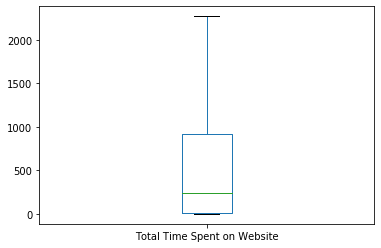

In [86]:
df['Total Time Spent on Website'].plot.box()

__'Total Time Spent on Website'__ - No outliers observed. And, anyhow no missing values. Good to go.

In [87]:
df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

#### Drop the column 'Last Notable Activity' as we already  have a similar feature - Last Activity

In [88]:
df.drop('Last Notable Activity', axis=1, inplace=True)

### <font color=Green> Final dataframe post imputing missing values and treating outliers </font>

In [89]:
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Website Activity,Finance Management,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Media and Advertising,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Mumbai,0


In [90]:
df.shape

(9074, 12)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  City                                    9074 non-null   obje

In [92]:
df.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
City                                      0
A free copy of Mastering The Interview    0
dtype: int64

### Data Imbalance

In [93]:
100 * df.Converted.value_counts(normalize=True)

0    62.144589
1    37.855411
Name: Converted, dtype: float64

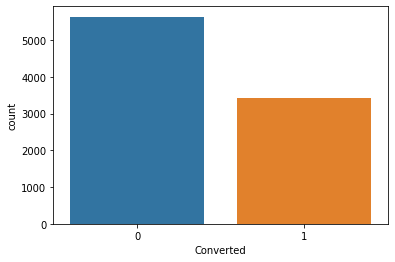

In [94]:
sns.countplot(x='Converted', data=df)
plt.show()

### Identify the continuous and categorical features for further univariate & bivariate analysis

In [95]:
df_num = df.select_dtypes(include=['int64','float64'])
df_cat = df.select_dtypes(include=['object'])

In [96]:
df_num.shape

(9074, 6)

In [97]:
df_cat.shape

(9074, 6)

#### Observe the data spread of continuous features with a density plot

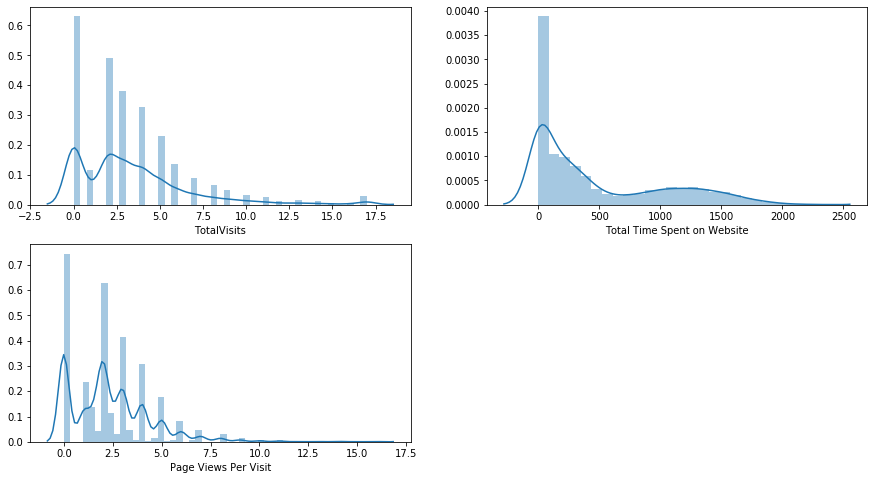

In [98]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.distplot(df['TotalVisits'])
plt.subplot(222)
sns.distplot(df['Total Time Spent on Website'])
plt.subplot(223)
sns.distplot(df['Page Views Per Visit'])
plt.show()

#### Observe the data spread of categorical features with count plots

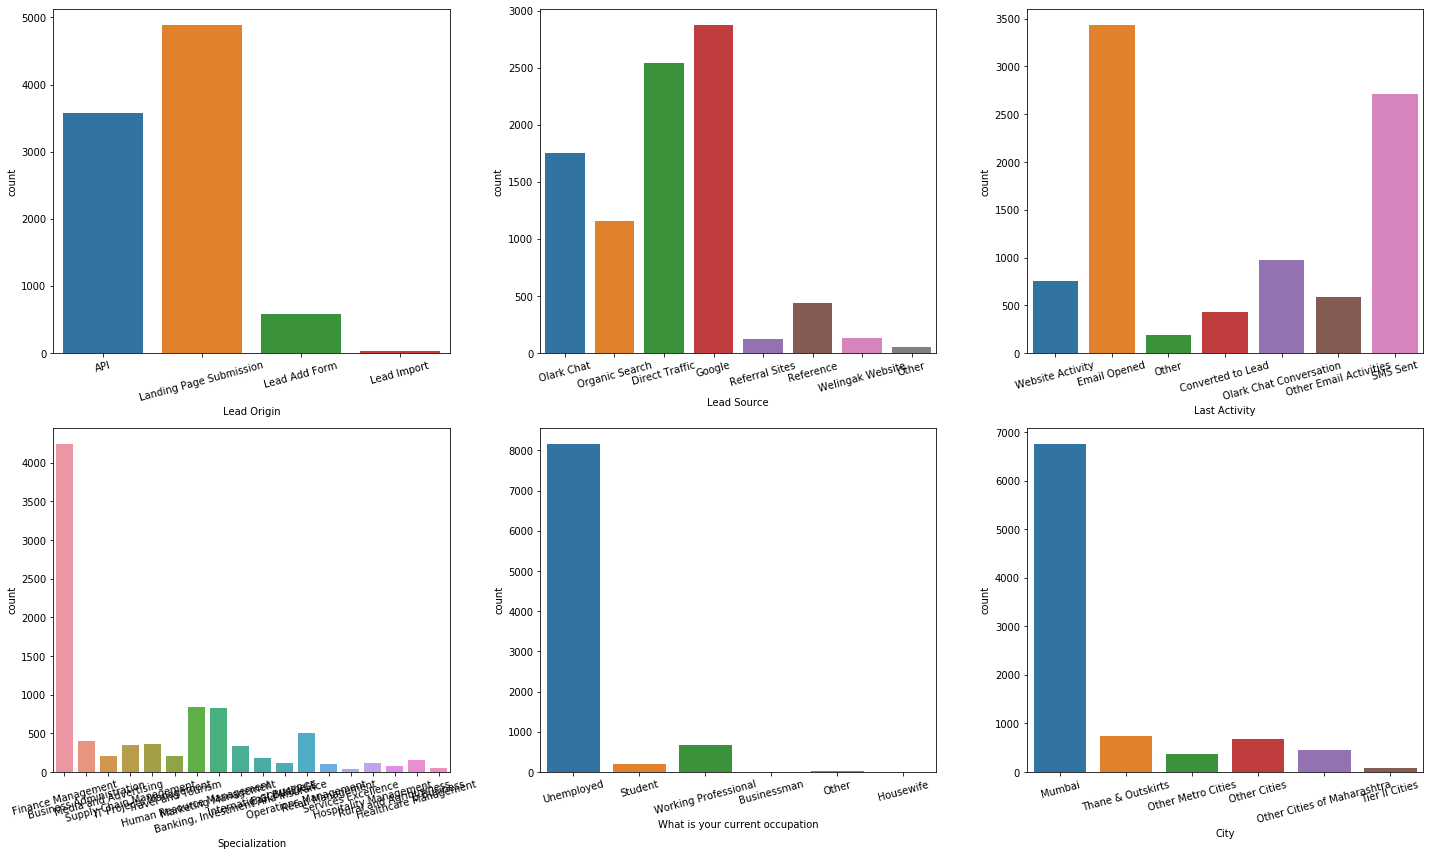

In [99]:
plt.figure(figsize=(20,12))
i = 1
for col in df_cat.columns:
    plt.subplot(2,3,i)
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=15)
    i += 1

plt.tight_layout()
plt.show()

## <font color=blue>2.2 Bivariate Analysis</font>

<Figure size 1080x576 with 0 Axes>

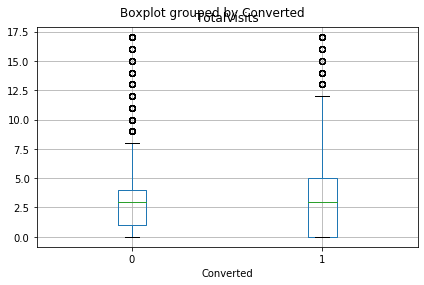

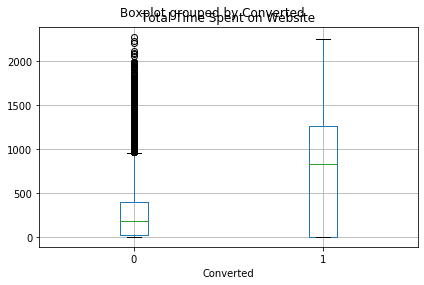

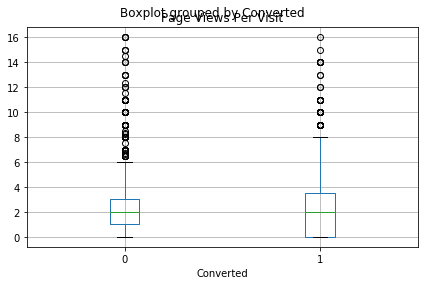

In [100]:
plt.figure(figsize=(15,8))
df.boxplot(column='TotalVisits',by='Converted')
plt.tight_layout()
plt.show()
df.boxplot(column='Total Time Spent on Website',by='Converted')
plt.tight_layout()
plt.show()
df.boxplot(column='Page Views Per Visit',by='Converted')
plt.tight_layout()
plt.show()

#### From the above bivariate analysis of continuous features against the target feature 'Converted', the following observations can be made:
    - Total Visits are quite higher for the converted deals
    - Time Spent on the website is clearly huge for the converted deals
    - Pages per visit also quite spead on higher side for the converted deals
    
<font color=green>__All the three continuous features are directly proportional to the lead conversion__</font>

#### Split the dataframe into two splits with converted and without converted data for bivariate analysis

In [101]:
df_Conv0 = df[df.Converted == 0]
df_Conv1 = df[df.Converted == 1]
print(df_Conv0.shape)
print(df_Conv1.shape)

(5639, 12)
(3435, 12)


#### Bivariate analysis of categorical variables against the Converted target column

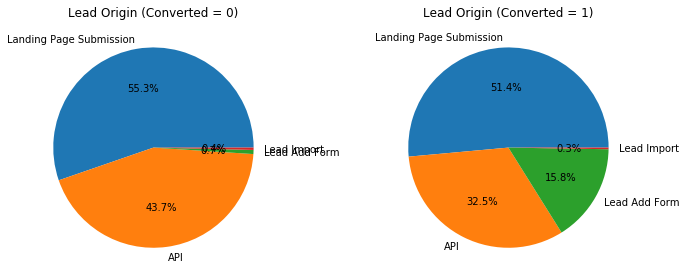

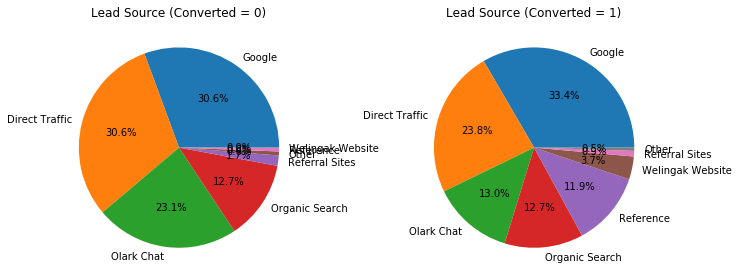

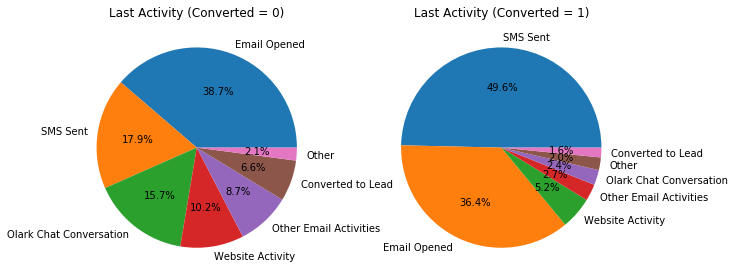

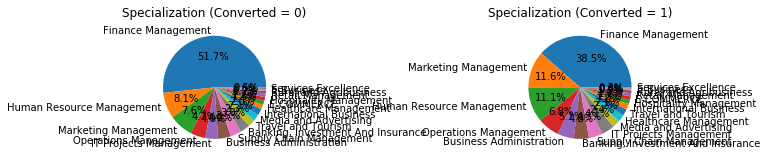

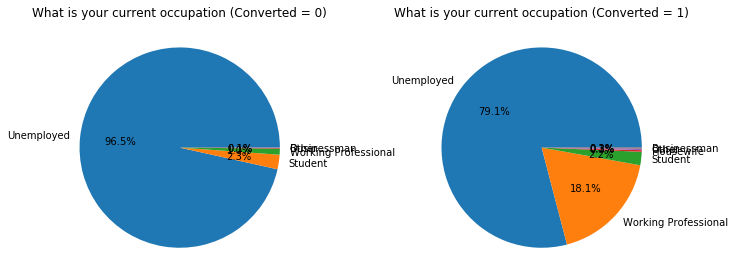

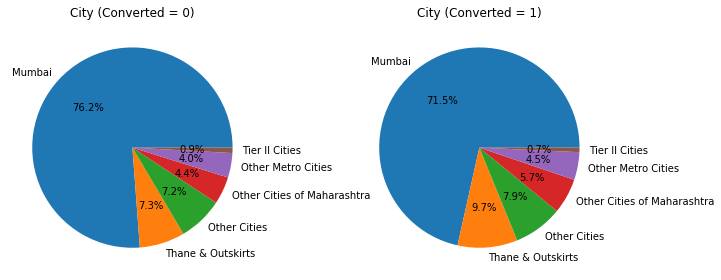

In [102]:
for i in range(len(df_cat.columns)):
    plt.figure(figsize=(10,4))
    j = 0
    plt.subplot(1,2,j+1)
    title = df_cat.columns[i]+' (Converted = 0)'
    plt.title(title)
    plt.pie(df_Conv0[df_cat.columns[i]].value_counts().values, labels=df_Conv0[df_cat.columns[i]].value_counts().index, autopct='%1.1f%%')

    plt.subplot(1,2,j+2)
    title = df_cat.columns[i]+' (Converted = 1)'
    plt.title(title)
    plt.pie(df_Conv1[df_cat.columns[i]].value_counts().values, labels=df_Conv1[df_cat.columns[i]].value_counts().index, autopct='%1.1f%%')

    plt.tight_layout()
    plt.show()

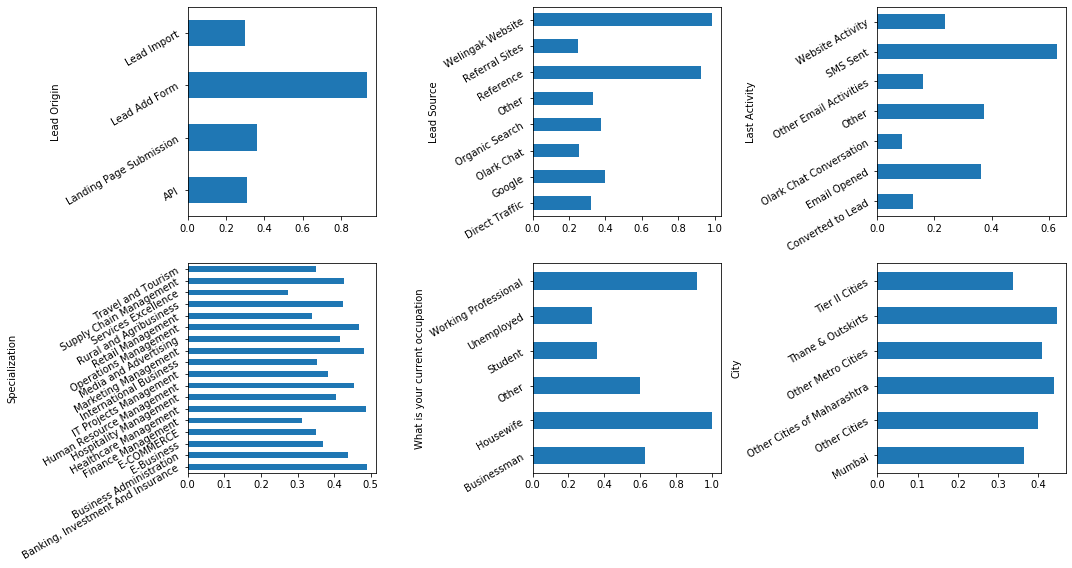

In [103]:
plt.figure(figsize=(15,8))
for i in range(len(df_cat.columns)):
    plt.subplot(2,3,i+1)
    catGrp = df.groupby(df_cat.columns[i])
    catGrp.Converted.mean().plot.barh()
    plt.yticks(rotation=30)
plt.tight_layout()
plt.show()

#### Following are the observations of bivariate analysis of categorical features
    - Lead origin of 'Lead Add Form' influences more for conversion of the lead
    - 'Welingak Website' and 'References' lead sources are reliable for lead conversion
    - 'Olark Chat' lead source and 'Olark Chat Conversation' activity are not reliable for a lead to be converted
    - 'SMS Sent' activity is an higher reliable for a lead to be converted
    - 'Finance Management' specialization is not leading for a good conversion rate
    - 'Unemployed' candidates as expected not ideal candidates for a lead conversion
    - City is not playing any influence in lead conversion

# <font color=blue>3. Data Preparation</font>

#### Create the dummy variables for all the categorical variables

In [104]:
dummy = pd.get_dummies(df_cat, drop_first=True)

In [105]:
dummy.shape

(9074, 43)

In [106]:
dummy.describe()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Other Email Activities,Last Activity_SMS Sent,Last Activity_Website Activity,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.00000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.538351,0.064029,0.003306,0.316619,0.193189,0.127177,0.005951,0.048821,0.013776,0.014216,0.378223,0.107119,0.020608,0.06425,0.299317,0.083315,0.043972,0.006282,0.012233,0.467379,0.017192,0.012233,0.092242,0.040335,0.019396,0.090699,0.022261,0.054992,0.011020,0.008045,0.004408,0.038131,0.022261,0.000992,0.001653,0.022702,0.899162,0.074609,0.074939,0.049151,0.041547,0.082103,0.008155
std,0.498554,0.244818,0.057407,0.465183,0.394822,0.333189,0.076918,0.215505,0.116565,0.118389,0.484971,0.309282,0.142077,0.24521,0.457984,0.276373,0.205044,0.079012,0.109929,0.498962,0.129993,0.109929,0.289383,0.196755,0.137920,0.287196,0.147541,0.227978,0.104404,0.089337,0.066251,0.191523,0.147541,0.031480,0.040627,0.148961,0.301130,0.262774,0.263308,0.216196,0.199563,0.274536,0.089942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.00

#### Identify the highly correlated dummy variables and remove them as they will anyhow won't fit in the model because of correlation

In [107]:
def plotCorrelation(df):
    corr = df.corr()
    corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    corrdf = corr.unstack().reset_index()
    corrdf.columns = ['Variable 1', 'Variable 2', 'Correlation']
    corrdf.dropna(subset = ['Correlation'], inplace = True)
    corrdf['Correlation'] = round(corrdf['Correlation'], 2)
    # Since we see correlation as an absolute value, we are converting it into absolute value
    corrdf['Correlation_Abs'] = corrdf['Correlation'].abs()
    corrdf = corrdf.sort_values(by = 'Correlation_Abs', ascending = False)
    return corrdf.head(10)

In [108]:
plotCorrelation(dummy)

,Variable 1,Variable 2,Correlation,Correlation_Abs
302,Lead Source_Reference,Lead Origin_Lead Add Form,0.87,0.87
1627,What is your current occupation_Working Profes...,What is your current occupation_Unemployed,-0.85,0.85
260,Lead Source_Other,Lead Origin_Lead Import,0.74,0.74
817,Specialization_Finance Management,Lead Origin_Landing Page Submission,-0.60,0.60
172,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.53,0.53
612,Last Activity_SMS Sent,Last Activity_Email Opened,-0.51,0.51
388,Lead Source_Welingak Website,Lead Origin_Lead Add Form,0.46,0.46
1583,What is your current occupation_Unemployed,What is your current occupation_Student,-0.46,0.46
477,Last Activity_Olark Chat Conversation,Lead Source_Olark Chat,0.42,0.42
821,Specialization_Finance Management,Lead Source_Olark Chat,0.41,0.41


#### <font color=red>Drop all the variables that have correlation higher than 0.6</font>

In [109]:
df_corr = plotCorrelation(dummy)
dropCols = df_corr['Variable 1'][df_corr['Correlation_Abs'] > 0.6]

dummy.drop(dropCols, axis=1, inplace=True)

dummy.shape

(9074, 40)

#### Create the final dataframe for the model by combining the continuous features and the dummy variables out of categorical features

In [110]:
df_model = pd.concat([df_num, dummy], axis=1)

df_model.shape

(9074, 46)

In [111]:
plotCorrelation(df_model)

,Variable 1,Variable 2,Correlation,Correlation_Abs
186,Page Views Per Visit,TotalVisits,0.71,0.71
1064,Specialization_Finance Management,Lead Origin_Landing Page Submission,-0.60,0.60
281,Lead Origin_Landing Page Submission,A free copy of Mastering The Interview,0.56,0.56
466,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.53,0.53
464,Lead Source_Olark Chat,Page Views Per Visit,-0.52,0.52
842,Last Activity_SMS Sent,Last Activity_Email Opened,-0.51,0.51
280,Lead Origin_Landing Page Submission,Page Views Per Visit,0.50,0.50
1879,What is your current occupation_Unemployed,What is your current occupation_Student,-0.46,0.46
605,Lead Source_Welingak Website,Lead Origin_Lead Add Form,0.46,0.46
462,Lead Source_Olark Chat,TotalVisits,-0.45,0.45


#### Page Views Per Visit and TotalVisits are correlated as expected, however we will leave it to the model to decide which one to hold

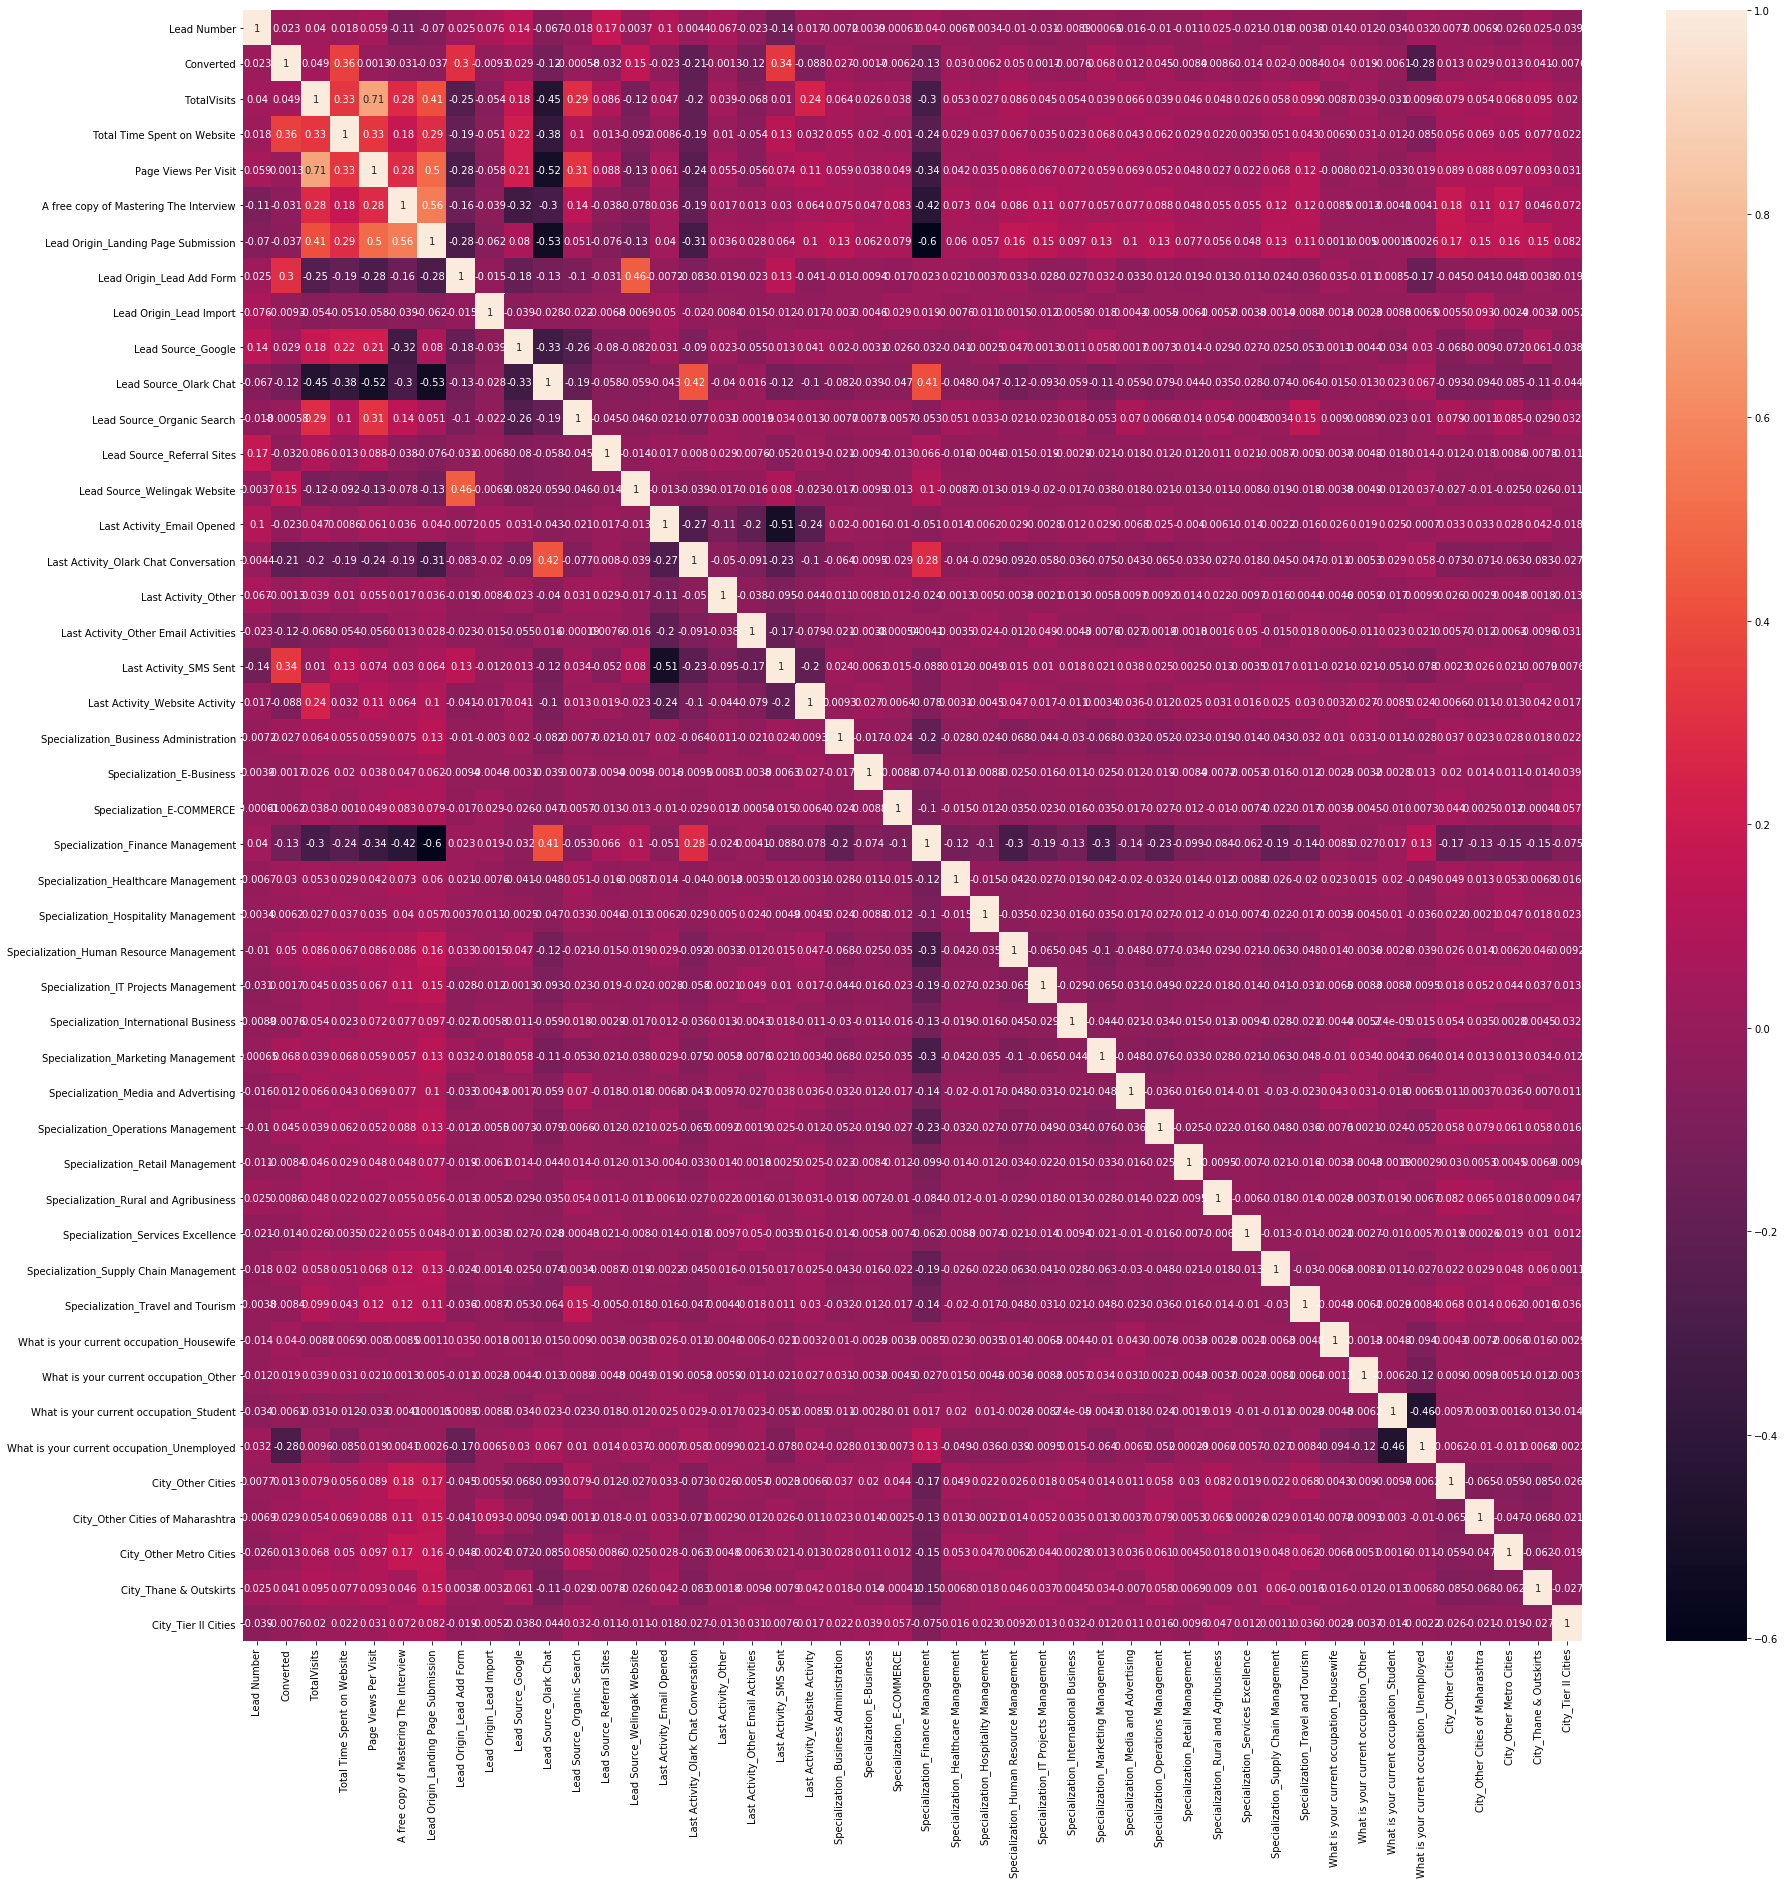

In [112]:
plt.figure(figsize=(30,30))
sns.heatmap(df_model.corr(), annot=True)
plt.show()

In [113]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 46 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Lead Number                                 9074 non-null   int64  
 1   Converted                                   9074 non-null   int64  
 2   TotalVisits                                 9074 non-null   float64
 3   Total Time Spent on Website                 9074 non-null   int64  
 4   Page Views Per Visit                        9074 non-null   float64
 5   A free copy of Mastering The Interview      9074 non-null   int64  
 6   Lead Origin_Landing Page Submission         9074 non-null   uint8  
 7   Lead Origin_Lead Add Form                   9074 non-null   uint8  
 8   Lead Origin_Lead Import                     9074 non-null   uint8  
 9   Lead Source_Google                          9074 non-null   uint8  
 10  Lead Source_

In [114]:
df_model.isnull().sum()

Lead Number                                   0
Converted                                     0
TotalVisits                                   0
Total Time Spent on Website                   0
Page Views Per Visit                          0
A free copy of Mastering The Interview        0
Lead Origin_Landing Page Submission           0
Lead Origin_Lead Add Form                     0
Lead Origin_Lead Import                       0
Lead Source_Google                            0
Lead Source_Olark Chat                        0
Lead Source_Organic Search                    0
Lead Source_Referral Sites                    0
Lead Source_Welingak Website                  0
Last Activity_Email Opened                    0
Last Activity_Olark Chat Conversation         0
Last Activity_Other                           0
Last Activity_Other Email Activities          0
Last Activity_SMS Sent                        0
Last Activity_Website Activity                0
Specialization_Business Administration  

#### All the features in the final dataframe are of numeric type and none of them have any missing values. The data is eligible for the model building.

In [115]:
df_model.to_csv('Leads_ForModel.csv')

# <font color=blue>4. Model Building</font>

#### Split the dependent and independent features

In [116]:
X = df_model.drop('Converted', axis=1)
y = df_model.Converted

#### Split the data into train and test data with70-30 ratio
Keep the 'Lead Number' as backup as it might needed at the end to form the final prediction data set for every lead number

In [117]:
X_train_LN, X_test_LN, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train = X_train_LN.drop('Lead Number', axis=1)
X_test = X_test_LN.drop('Lead Number', axis=1)

#### Perform scaling of the continuous features with standard scaler
    - TotalVisits
    - Total Time Spent on Website
    - Page Views Per Visit

In [118]:
scaler = StandardScaler()

In [119]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Other Email Activities,Last Activity_SMS Sent,Last Activity_Website Activity,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,2.0,397,2.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1012,2.0,190,2.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4750,2.0,1380,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
7987,5.0,1584,2.5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [120]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
    X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [121]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Other Email Activities,Last Activity_SMS Sent,Last Activity_Website Activity,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,-0.417238,-0.160255,-0.179975,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1012,-0.417238,-0.540048,-0.179975,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-1.034493,-0.888650,-1.137686,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4750,-0.417238,1.643304,-0.179975,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
7987,0.508645,2.017593,0.059452,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


#### Data imbalance ratio

In [122]:
Converted = 100 * (sum(df.Converted) / len(df.index))
print('Conversion Rate: ',Converted)

Conversion Rate:  37.85541106458012


## <font color=blue>4.1 RFE</font>

#### Perform Recursive Feature Elimination (RFE) to filter the initial 20 features to start model building process

In [123]:
logReg = LogisticRegression()
rfe20 = RFE(logReg, 20).fit(X_train, y_train)
RFE_Sup20 = list(zip(X_train.columns, rfe20.support_, rfe20.ranking_))

df_RFE20 = pd.concat([pd.Series(X_train.columns), pd.Series(rfe20.support_), pd.Series(rfe20.ranking_)], axis=1)
df_RFE20.columns = ['Feature', 'RFE_Support', 'RFE_Ranking']
#df_RFE20.to_csv('df_RFE20.csv')

#### Define methods to build a logistic regression model and verifying (Variance Influence Factor) VIF as these two steps are most common in the iterative procedure of model building

In [124]:
def build_model(X,y):
    X = sm.add_constant(X)
    logit = sm.GLM(y,X,family=sm.families.Binomial()).fit()
    print(logit.summary())
    return logit
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Build the first model taking the filtered features of RFE process

### <font color=green>Model 1</font>

In [125]:
cols1 = list(X_train.columns[rfe20.support_])

In [126]:
logit1 = build_model(X_train[cols1], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.9
Date:                Mon, 07 Sep 2020   Deviance:                       5421.8
Time:                        19:23:04   Pearson chi2:                 6.73e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

Drop the column __What is your current occupation_Housewife__ as it is highly insignificant.

In [127]:
cols2 = cols1.copy()
cols2.remove('What is your current occupation_Housewife')

### <font color=green>Model 2</font>

In [128]:
logit2 = build_model(X_train[cols2], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2711.6
Date:                Mon, 07 Sep 2020   Deviance:                       5423.3
Time:                        19:23:05   Pearson chi2:                 6.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [129]:
checkVIF(X_train[cols2])

,Features,VIF
17,What is your current occupation_Unemployed,8.29
1,Lead Origin_Landing Page Submission,3.99
6,Last Activity_Email Opened,3.35
9,Last Activity_SMS Sent,2.97
11,Specialization_Finance Management,2.97
4,Lead Source_Olark Chat,2.21
7,Last Activity_Olark Chat Conversation,1.96
2,Lead Origin_Lead Add Form,1.69
10,Last Activity_Website Activity,1.53
5,Lead Source_Welingak Website,1.33


Drop the feature __'What is your current occupation_Unemployed'__ due to its high VIF

In [130]:
cols3 = cols2.copy()
cols3.remove('What is your current occupation_Unemployed')

### <font color=green>Model 3</font>

In [131]:
logit3 = build_model(X_train[cols3], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2877.9
Date:                Mon, 07 Sep 2020   Deviance:                       5755.7
Time:                        19:23:06   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [132]:
checkVIF(X_train[cols3])

,Features,VIF
1,Lead Origin_Landing Page Submission,2.95
6,Last Activity_Email Opened,2.64
9,Last Activity_SMS Sent,2.47
11,Specialization_Finance Management,2.36
4,Lead Source_Olark Chat,2.14
7,Last Activity_Olark Chat Conversation,1.74
2,Lead Origin_Lead Add Form,1.69
10,Last Activity_Website Activity,1.36
5,Lead Source_Welingak Website,1.32
0,Total Time Spent on Website,1.30


The VIFs are in control but the feature __What is your current occupation_Other__ seems to be insignificant because of high p-value. Drop this feature.

In [133]:
cols4 = cols3.copy()
cols4.remove('What is your current occupation_Other')

### <font color=green>Model 4</font>

In [134]:
logit4 = build_model(X_train[cols4], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.1
Date:                Mon, 07 Sep 2020   Deviance:                       5756.3
Time:                        19:23:06   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Drop the feature __Specialization_Services Excellence__ as it is insignificant because of its high p-value.

In [135]:
cols5 = cols4.copy()
cols5.remove('Specialization_Services Excellence')

### <font color=green>Model 5</font>

In [136]:
logit5 = build_model(X_train[cols5], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.5
Date:                Mon, 07 Sep 2020   Deviance:                       5756.9
Time:                        19:23:06   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Drop the feature __Specialization_Hospitality Management__ as it is insignificant because of its high p-value.

In [137]:
cols6 = cols5.copy()
cols6.remove('Specialization_Hospitality Management')

### <font color=green>Model 6</font>

In [138]:
logit6 = build_model(X_train[cols6], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2879.0
Date:                Mon, 07 Sep 2020   Deviance:                       5758.0
Time:                        19:23:07   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Drop the feature __What is your current occupation_Student__ as it is insignificant because of its high p-value.

In [139]:
cols7 = cols6.copy()
cols7.remove('What is your current occupation_Student')

### <font color=green>Model 7</font>

In [140]:
logit7 = build_model(X_train[cols7], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2880.0
Date:                Mon, 07 Sep 2020   Deviance:                       5760.1
Time:                        19:23:07   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Drop the feature __City_Tier II Cities__ as it is insignificant because of its high p-value.

In [141]:
cols8 = cols7.copy()
cols8.remove('City_Tier II Cities')

### <font color=green>Model 8</font>

In [142]:
logit8 = build_model(X_train[cols8], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2881.3
Date:                Mon, 07 Sep 2020   Deviance:                       5762.6
Time:                        19:23:07   Pearson chi2:                 6.56e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [143]:
checkVIF(X_train[cols8])

,Features,VIF
1,Lead Origin_Landing Page Submission,2.90
6,Last Activity_Email Opened,2.63
9,Last Activity_SMS Sent,2.46
11,Specialization_Finance Management,2.35
4,Lead Source_Olark Chat,2.14
7,Last Activity_Olark Chat Conversation,1.74
2,Lead Origin_Lead Add Form,1.68
10,Last Activity_Website Activity,1.36
5,Lead Source_Welingak Website,1.32
0,Total Time Spent on Website,1.30


Drop the feature __Lead Origin_Landing Page Submission__ as it is bit on higher side of VIF value

In [144]:
cols9 = cols8.copy()
cols9.remove('Lead Origin_Landing Page Submission')

### <font color=green>Model 9</font>

In [145]:
logit9 = build_model(X_train[cols9], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2902.5
Date:                Mon, 07 Sep 2020   Deviance:                       5805.1
Time:                        19:23:08   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [146]:
checkVIF(X_train[cols9])

,Features,VIF
10,Specialization_Finance Management,2.19
3,Lead Source_Olark Chat,1.93
6,Last Activity_Olark Chat Conversation,1.52
1,Lead Origin_Lead Add Form,1.51
5,Last Activity_Email Opened,1.39
8,Last Activity_SMS Sent,1.38
4,Lead Source_Welingak Website,1.32
0,Total Time Spent on Website,1.30
9,Last Activity_Website Activity,1.06
11,Specialization_Travel and Tourism,1.03


### <font color=green>This model has all the variables significant (p-value is 5% or lesser) and the VIFs are under 2 for all variables and one variable with little over 2. This is our final model.</font>

### Final features in the order of influence on the model

In [147]:
params_df = pd.DataFrame({'Feature':logit9.params.index, 'Coefficient': logit9.params.values})
params_df['Coefficient_abs'] = params_df['Coefficient'].abs()
params_df.sort_values(by='Coefficient_abs', ascending=False)

,Feature,Coefficient,Coefficient_abs
2,Lead Origin_Lead Add Form,4.160720,4.160720
9,Last Activity_SMS Sent,2.223847,2.223847
0,const,-2.162416,2.162416
5,Lead Source_Welingak Website,1.690308,1.690308
8,Last Activity_Other,1.621919,1.621919
3,Lead Origin_Lead Import,1.517561,1.517561
4,Lead Source_Olark Chat,1.401074,1.401074
6,Last Activity_Email Opened,1.174983,1.174983
1,Total Time Spent on Website,1.145765,1.145765
10,Last Activity_Website Activity,0.539057,0.539057


## 4.1 Make predictions on the train data

In [148]:
y_train_pred = logit9.predict(sm.add_constant(X_train[cols9]))

In [149]:
y_train_pred[:10]

3009    0.175298
1012    0.040751
9226    0.516703
4750    0.874821
7987    0.880338
1281    0.675752
2880    0.085123
4971    0.859947
7536    0.895904
1248    0.859693
dtype: float64

In [150]:
y_train_pred = y_train_pred.values.reshape(-1)

#### Create a dataframe with unique identifier 'Lead Number', Target column 'Converted' and the Predicted Probability

In [151]:
y_train_pred_final = pd.DataFrame({'Lead Number':X_train_LN['Lead Number'].values,'Converted':y_train.values, 'Conv_Probability':y_train_pred})
y_train_pred_final.head()

,Lead Number,Converted,Conv_Probability
0,630949,0,0.175298
1,649355,0,0.040751
2,579735,0,0.516703
3,614238,1,0.874821
4,588625,1,0.880338


#### Initially, lets assume the probability 0.5 as cutoff to determine the lead conversion with the predicted probability

In [152]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conv_Probability.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Conv_Probability,Predicted
0,630949,0,0.175298,0
1,649355,0,0.040751,0
2,579735,0,0.516703,1
3,614238,1,0.874821,1
4,588625,1,0.880338,1


# <font color=blue>5. Metrics Evaluation</font>
### 5.1 Accuracy, Precision & Recall Metrics

In [153]:
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7968823807274446

In [154]:
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3410,  495],
       [ 795, 1651]], dtype=int64)

In [216]:
sens = confusion[1,1] / (confusion[1,1] + confusion[1,0])
sens

0.6749795584627964

In [155]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7693383038210625

In [156]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6749795584627964

### 5.2 Precision Recall Curve

In [157]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Probability)

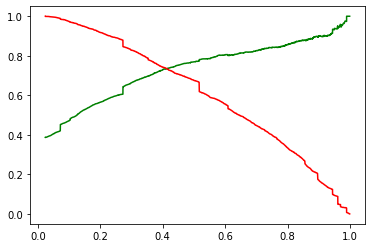

In [158]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

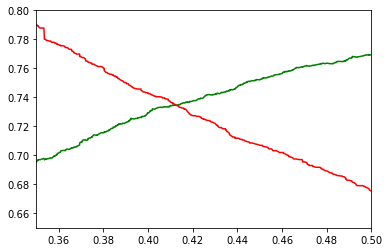

In [159]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.ylim([0.65,0.8])
plt.xlim([0.35,0.5])
plt.show()

#### <font color=green>By the above precision recall tradeoff curve, the probability cutoff 0.41 seems to be an ideal pick</font>
Let's predict the Lead Conversion with the _0.41 cutoff_ and re-evaluate the metrics

In [160]:
y_train_pred_final['Predicted_PR'] = y_train_pred_final.Conv_Probability.map(lambda x: 1 if x>0.41 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Conv_Probability,Predicted,Predicted_PR
0,630949,0,0.175298,0,0
1,649355,0,0.040751,0,0
2,579735,0,0.516703,1,1
3,614238,1,0.874821,1,1
4,588625,1,0.880338,1,1


#### Recompute Accuracy, Precision and Recall Metrics

In [161]:
acc_PR = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_PR)
acc_PR

0.7959376476145489

In [162]:
prec_PR = precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_PR)
prec_PR

0.7341205211726385

In [163]:
recall_PR = recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_PR)
recall_PR

0.7371218315617334

### 5.3 Metrics out of Confusion Matrix (Sensitivity, Specificity etc)
Let's also evaluate the confusion matrix and corresponding metrics

In [164]:
cm_pr = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_PR)
cm_pr

array([[3252,  653],
       [ 643, 1803]], dtype=int64)

#### Sensitivity or True Positive Rate (TPR)
The number of positives predicted correctly out of the actual positives

In [165]:
sensitivity_PR = cm_pr[1,1]/(cm_pr[1,0]+cm_pr[1,1])
sensitivity_PR

0.7371218315617334

#### Specificity
The number of negatives predicted correctly out of the actual negatives

In [166]:
specificity_PR = cm_pr[0,0]/(cm_pr[0,0]+cm_pr[0,1])
specificity_PR

0.8327784891165173

#### Positive Predictive Value or Precision
Number of positives correctly predicted out of the total positives that are predicted

In [167]:
PPV_PR = cm_pr[1,1] / (cm_pr[1,1] + cm_pr[0,1])
PPV_PR

0.7341205211726385

#### False Positive Rate
Predicting as positive when it is not (1-Specifity)

In [168]:
FPR_PR = cm_pr[0,1] / (cm_pr[0,1] + cm_pr[0,0])
FPR_PR

0.16722151088348272

#### Negative Predictive Value
Number of negatives correctly predicted out of the total negatives that are predicted

In [169]:
NPV_PR = cm_pr[0,0] / (cm_pr[0,0] + cm_pr[1,0])
NPV_PR

0.8349165596919127

### 5.4 Receiver Operating Characteristic Curve (ROC Curve)

In [170]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC Curve Area = %0.2f' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

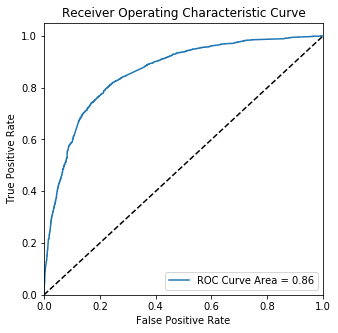

In [171]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Probability)

#### <font color=green>The ROC area of 0.86 indicates significantly a good model</font>

#### Identify the prediction for all probabilities from 0.0 to 0.9 and later to see the trade-off between Sensitivity and Specificity for all the probabilities to arrive at an optimal cutoff probability

In [172]:
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Conv_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead Number,Converted,Conv_Probability,Predicted,Predicted_PR,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,630949,0,0.175298,0,0,1,1,0,0,0,0,0,0,0,0
1,649355,0,0.040751,0,0,1,0,0,0,0,0,0,0,0,0
2,579735,0,0.516703,1,1,1,1,1,1,1,1,0,0,0,0
3,614238,1,0.874821,1,1,1,1,1,1,1,1,1,1,1,0
4,588625,1,0.880338,1,1,1,1,1,1,1,1,1,1,1,0


#### Identify the metrics accuracy, sensitivity & specifity for all the different predictions

In [173]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity', 'Precision', 'Recall'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    prec = precision_score(y_train_pred_final.Converted, y_train_pred_final[i])
    recall = recall_score(y_train_pred_final.Converted, y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity, prec, recall]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.385136     1.000000     0.000000   0.385136  1.000000
0.1          0.1  0.569674     0.973017     0.317029   0.471567  0.973017
0.2          0.2  0.696268     0.917825     0.557490   0.565064  0.917825
0.3          0.3  0.772162     0.828700     0.736748   0.663502  0.828700
0.4          0.4  0.794678     0.742437     0.827401   0.729317  0.742437
0.5          0.5  0.796882     0.674980     0.873239   0.769338  0.674980
0.6          0.6  0.777043     0.555601     0.915749   0.805095  0.555601
0.7          0.7  0.750748     0.447261     0.940845   0.825660  0.447261
0.8          0.8  0.721934     0.334015     0.964917   0.856394  0.334015
0.9          0.9  0.673122     0.170482     0.987964   0.898707  0.170482


#### Accuracy, Sensitivity, Specificity Trade-off

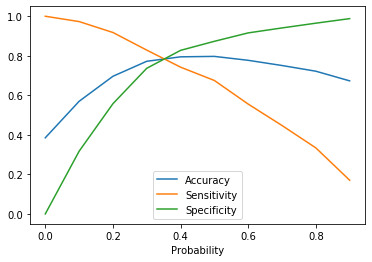

In [174]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

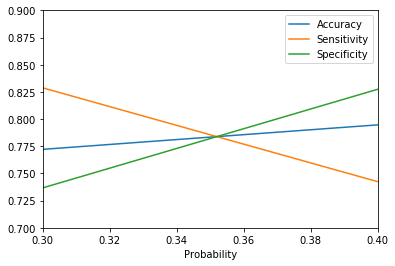

In [175]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.xlim([0.3,0.4])
plt.ylim([0.7,0.9])
plt.show()

#### From the above Sensitivity-Specificity tradeoff curve, it seems to be 0.35 might be an optimal cutoff.

In [176]:
y_train_pred_final['Predicted_final'] = y_train_pred_final.Conv_Probability.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Conv_Probability,Predicted,Predicted_PR,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_final
0,630949,0,0.175298,0,0,1,1,0,0,0,0,0,0,0,0,0
1,649355,0,0.040751,0,0,1,0,0,0,0,0,0,0,0,0,0
2,579735,0,0.516703,1,1,1,1,1,1,1,1,0,0,0,0,1
3,614238,1,0.874821,1,1,1,1,1,1,1,1,1,1,1,0,1
4,588625,1,0.880338,1,1,1,1,1,1,1,1,1,1,1,0,1


#### Compute Accuracy, Sensitivity, Specificity metrics

In [177]:
acc = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)
acc

0.7861754054479609

In [178]:
cm = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)
cm

array([[3061,  844],
       [ 514, 1932]], dtype=int64)

#### Sensitivity or True Positive Rate (TPR)
The number of positives predicted correctly out of the actual positives

In [179]:
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
sensitivity

0.7898609975470156

#### Specificity
The number of negatives predicted correctly out of the actual negatives

In [180]:
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity

0.7838668373879641

#### Positive Predictive Value or Precision
Number of positives correctly predicted out of the total positives that are predicted

In [181]:
PPV = cm[1,1] / (cm[1,1] + cm[0,1])
PPV

0.6959654178674352

#### False Positive Rate
Predicting as positive when it is not (1-Specifity)

In [182]:
FPR = cm[0,1] / (cm[0,1] + cm[0,0])
FPR

0.21613316261203586

#### Negative Predictive Value
Number of negatives correctly predicted out of the total negatives that are predicted

In [183]:
NPV = cm[0,0] / (cm[0,0] + cm[1,0])
NPV

0.8562237762237762

#### Compute Precision and Recall for the new cutoff

In [184]:
prec = precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)
prec

0.6959654178674352

In [185]:
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)
recall

0.7898609975470156

#### Formulate a table with all the metrics for both the cutoffs 0.43 and 0.35 to clear identify which to finalize

In [186]:
Metrics_Compare = pd.DataFrame( columns = ['Metric','Precision_Recall_0.41','Sens_Spec_0.35'])
Metrics_Compare.loc[0] =['Accuracy', acc_PR, acc]
Metrics_Compare.loc[1] =['Sensitivity', sensitivity_PR, sensitivity]
Metrics_Compare.loc[2] =['Specificity', specificity_PR, specificity]
Metrics_Compare.loc[3] =['Precision', prec_PR, prec]
Metrics_Compare.loc[4] =['Recall', recall_PR, recall]
Metrics_Compare.loc[5] =['Negative Predictive Value', NPV_PR, NPV]
Metrics_Compare.loc[6] =['False Positive Rate', FPR_PR, FPR]

Metrics_Compare['Difference'] = (Metrics_Compare['Precision_Recall_0.41'] - Metrics_Compare['Sens_Spec_0.35'])

Metrics_Compare

,Metric,Precision_Recall_0.41,Sens_Spec_0.35,Difference
0,Accuracy,0.795938,0.786175,0.009762
1,Sensitivity,0.737122,0.789861,-0.052739
2,Specificity,0.832778,0.783867,0.048912
3,Precision,0.734121,0.695965,0.038155
4,Recall,0.737122,0.789861,-0.052739
5,Negative Predictive Value,0.834917,0.856224,-0.021307
6,False Positive Rate,0.167222,0.216133,-0.048912


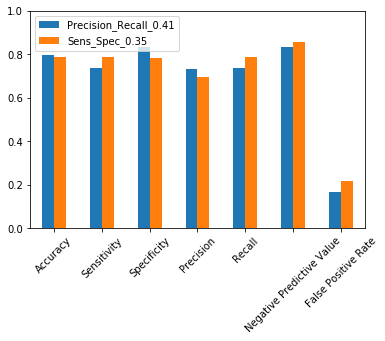

In [187]:
Metrics_Compare[['Metric','Precision_Recall_0.41','Sens_Spec_0.35']].plot.bar()
plt.ylim([0,1])
plt.xticks((0,1,2,3,4,5,6), Metrics_Compare.Metric, rotation=45)
plt.show()

#### Though both the cutoffs have very close metric values, as we need to  target the high Sensitivity, lets stick to the cutoff 0.35

# <font color=blue>6. Making predictions on the test data</font>

### 6.1 Scale the test data (the same continuous columns) as well using the same scaler instance

In [188]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(
    X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [189]:
X_test_sm = X_test[cols9]
X_test_sm = sm.add_constant(X_test_sm)

In [190]:
X_test_sm.shape

(2723, 13)

### 6.2 Make predictions on the test data with the final model

In [191]:
y_test_pred = logit9.predict(X_test_sm)

In [192]:
y_test_pred[:10]

3271    0.113744
1490    0.764048
7936    0.097305
4216    0.896145
3830    0.159647
1800    0.136361
6507    0.335019
4821    0.279004
4223    0.944090
4714    0.516703
dtype: float64

In [193]:
y_test_pred = y_test_pred.values.reshape(-1)

#### Create a dataframe with unique identifier 'Lead Number', Target column 'Converted' and the Predicted Probability

In [194]:
y_test_pred_final = pd.DataFrame({'Lead Number':X_test_LN['Lead Number'].values,'Converted':y_test.values, 'Conv_Probability':y_test_pred})
y_test_pred_final.head()

,Lead Number,Converted,Conv_Probability
0,628652,0,0.113744
1,644500,1,0.764048
2,588935,0,0.097305
3,619437,1,0.896145
4,623381,0,0.159647


#### <font color=green>As finalized the probability cutoff as 0.35, lets make predictions with the same cutoff</font>

In [195]:
y_test_pred_final['Predicted'] = y_test_pred_final.Conv_Probability.map( lambda x: 1 if x > 0.35 else 0)
y_test_pred_final.head()

,Lead Number,Converted,Conv_Probability,Predicted
0,628652,0,0.113744,0
1,644500,1,0.764048,1
2,588935,0,0.097305,0
3,619437,1,0.896145,1
4,623381,0,0.159647,0


### 6.3 Metric Evaluation on Test Data
Confusion Matrix

In [196]:
cm_test = confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted)
cm_test

array([[1372,  362],
       [ 220,  769]], dtype=int64)

#### Accuracy on test data

In [197]:
acc_test = accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)
acc_test

0.786265148733015

#### Sensitivity
The number of positives predicted correctly out of the actual positives

In [198]:
sensitivity_test = cm_test[1,1] / (cm_test[1,0] + cm_test[1,1])
sensitivity_test

0.7775530839231547

#### Specificity
The number of negatives predicted correctly out of the actual negatives

In [199]:
specificity_test = cm_test[0,0] / (cm_test[0,0] + cm_test[0,1])
specificity_test

0.7912341407151096

#### Positive Predictive Value or Precision
Number of positives correctly predicted out of the total positives that are predicted

In [200]:
PPV_test = cm_test[1,1] / (cm_test[1,1] + cm_test[0,1])
PPV_test

0.6799292661361627

#### False Positive Rate
Predicting as positive when it is not (1-Specifity)

In [201]:
FPR_test = cm_test[0,1] / (cm_test[0,1] + cm_test[0,0])
FPR_test

0.20876585928489041

#### Negative Predictive Value
Number of negatives correctly predicted out of the total negatives that are predicted

In [202]:
NPV_test = cm_test[0,0] / (cm_test[0,0] + cm_test[1,0])
NPV_test

0.8618090452261307

#### Evaluate Precision and Recall

In [203]:
prec_test = precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)
prec_test

0.6799292661361627

In [204]:
recall_test = recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)
recall_test

0.7775530839231547

### Create a table with all the metrics on train & test data respectively to clearly understand how it varies

In [205]:
Metrics_Compare = pd.DataFrame( columns = ['Metric','Train Data','Test Data'])
Metrics_Compare.loc[0] =['Accuracy', acc, acc_test]
Metrics_Compare.loc[1] =['Sensitivity', sensitivity, sensitivity_test]
Metrics_Compare.loc[2] =['Specificity', specificity, specificity_test]
Metrics_Compare.loc[3] =['Precision', prec, prec_test]
Metrics_Compare.loc[4] =['Recall', recall, recall_test]
Metrics_Compare.loc[5] =['Negative Predictive Value', NPV, NPV_test]
Metrics_Compare.loc[6] =['False Positive Rate', FPR, FPR_test]

Metrics_Compare['Difference'] = Metrics_Compare['Train Data'] - Metrics_Compare['Test Data']

Metrics_Compare

,Metric,Train Data,Test Data,Difference
0,Accuracy,0.786175,0.786265,-0.000090
1,Sensitivity,0.789861,0.777553,0.012308
2,Specificity,0.783867,0.791234,-0.007367
3,Precision,0.695965,0.679929,0.016036
4,Recall,0.789861,0.777553,0.012308
5,Negative Predictive Value,0.856224,0.861809,-0.005585
6,False Positive Rate,0.216133,0.208766,0.007367


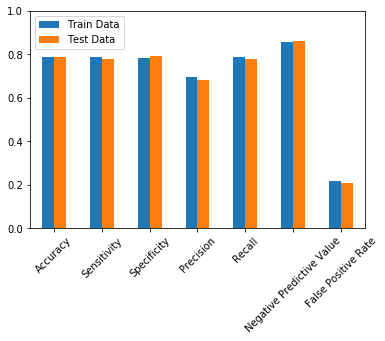

In [206]:
Metrics_Compare[['Metric','Train Data','Test Data']].plot.bar()
plt.ylim([0,1])
plt.xticks((0,1,2,3,4,5,6), Metrics_Compare.Metric, rotation=45)
plt.show()

# <font color=blue>7. Assigning Lead Score to all the leads</font>

In [207]:
y_train_pred_to_merge = y_train_pred_final[['Lead Number', 'Conv_Probability', 'Predicted_final']]
y_train_pred_to_merge.columns = ['Lead Number', 'Conv_Probability', 'Predicted']
y_train_pred_to_merge.shape

(6351, 3)

In [208]:
y_test_pred_to_merge = y_test_pred_final.drop('Converted', axis=1)
y_test_pred_to_merge.shape

(2723, 3)

In [209]:
df_pred_final = pd.concat([y_train_pred_to_merge, y_test_pred_to_merge], axis=0)
df_pred_final.head()

,Lead Number,Conv_Probability,Predicted
0,630949,0.175298,0
1,649355,0.040751,0
2,579735,0.516703,1
3,614238,0.874821,1
4,588625,0.880338,1


In [210]:
df_pred_final['Lead Score'] = round(100 * df_pred_final['Conv_Probability'])
df_pred_final.head()

,Lead Number,Conv_Probability,Predicted,Lead Score
0,630949,0.175298,0,18.0
1,649355,0.040751,0,4.0
2,579735,0.516703,1,52.0
3,614238,0.874821,1,87.0
4,588625,0.880338,1,88.0


In [211]:
df_final = pd.merge(df, df_pred_final, how='inner', on='Lead Number')
df_final.drop('Conv_Probability', axis=1, inplace=True)
df_final.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Predicted,Lead Score
0,660737,API,Olark Chat,0,0.0,0,0.0,Website Activity,Finance Management,Unemployed,Mumbai,0,0,17.0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Mumbai,0,0,28.0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,1,77.0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Media and Advertising,Unemployed,Mumbai,0,0,29.0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Mumbai,0,1,36.0


## 7.1 Metrics on whole dataframe

In [212]:
cm_f = confusion_matrix(df_final.Converted, df_final.Predicted)

#### Accuracy

In [213]:
accuracy_score(df_final.Converted, df_final.Predicted)

0.7862023363456028

#### Sensitivity

In [214]:
sen_f = cm_f[1,1] / (cm_f[1,0] + cm_f[1,1])
sen_f

0.7863173216885008

#### Precision

In [215]:
precision_score(df_final.Converted, df_final.Predicted)

0.6913232659329409